In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

In [2]:
from picamera.array import PiRGBArray
from picamera import PiCamera

In [3]:
from tensorflow import keras

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
import tensorflow as tf

In [5]:
camera = PiCamera()

In [7]:
def get_image():
    rawCapture = PiRGBArray(camera)
    camera.capture(rawCapture, format="rgb")
    image = rawCapture.array
    plt.imshow(image)
    plt.figure()
    small_image = cv.resize(image[0:480, 160:640], dsize=(299,299))
    plt.imshow(small_image)
    small_image_f32 = np.float32(small_image)
    small_image_f32_r3 = np.expand_dims(small_image_f32, 0)
    scaled_image = small_image_f32_r3/255
    return scaled_image

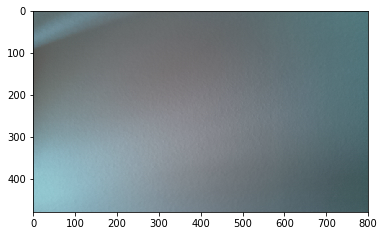

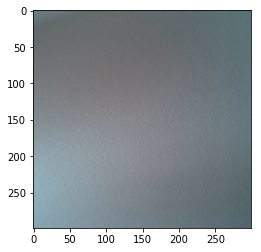

In [14]:
im = get_image()

In [2]:
iv3 = keras.applications.InceptionV3(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
)

In [3]:
def predict_image(im):
    prediction = iv3.predict(im)
    return keras.applications.inception_v3.decode_predictions(prediction)

In [13]:
predict_image(im)

40960/35363 [==================================] - 0s 6us/step


[[('n04009552', 'projector', 0.1320924),
  ('n03032252', 'cinema', 0.08816853),
  ('n03666591', 'lighter', 0.02425385),
  ('n02782093', 'balloon', 0.019955821),
  ('n03788365', 'mosquito_net', 0.019097483)]]

In [14]:
def capture_and_predict():
    im = get_image()
    prediction = predict_image(im)
    name = prediction[0][1]
    return name

In [15]:
capture_and_predict()

NameError: name 'capture_and_predict' is not defined

In [16]:
%time capture_and_predict()

NameError: name 'capture_and_predict' is not defined